In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn import mixture

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm, linear_model, datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#read in 2015-2022 datasets, add year column, add rank to years that don't have rank, clean column names 
df_15 = pd.read_csv('https://raw.githubusercontent.com/cklostermann/STAT-451-project/main/2015.csv')
df_15["Year"] = 2015
df_15.rename(columns = {'Family':'Social support'}, inplace = True)

df_16 = pd.read_csv('https://raw.githubusercontent.com/cklostermann/STAT-451-project/main/2016.csv')
df_16["Year"] = 2016
df_16.rename(columns = {'Family':'Social support'}, inplace = True)

df_17 = pd.read_csv('https://raw.githubusercontent.com/cklostermann/STAT-451-project/main/2017.csv')
df_17["Year"] = 2017
df_17. rename(columns = {'Happiness.Rank':'Happiness Rank', 'Happiness.Score':'Happiness Score',
                         'Economy..GDP.per.Capita.':'Economy (GDP per Capita)',
                         'Health..Life.Expectancy.':'Health (Life Expectancy)',
                         'Trust..Government.Corruption.':'Trust (Government Corruption)',
                        'Dystopia.Residual':'Dystopia Residual',
                        'Family':'Social support'}, inplace = True)

df_18 = pd.read_csv('https://raw.githubusercontent.com/cklostermann/STAT-451-project/main/2018.csv')
df_18["Year"] = 2018
df_18. rename(columns = {'Overall rank':'Happiness Rank', 'Score':'Happiness Score',
                         'Country or region':'Country',
                         'GDP per capita':'Economy (GDP per Capita)',
                         'Healthy life expectancy':'Health (Life Expectancy)',
                         'Freedom to make life choices':'Freedom',
                        'Perceptions of corruption':'Trust (Government Corruption)'}, inplace = True)

df_19 = pd.read_csv('https://raw.githubusercontent.com/cklostermann/STAT-451-project/main/2019.csv')
df_19["Year"] = 2019
df_19. rename(columns = {'Overall rank':'Happiness Rank', 'Score':'Happiness Score',
                         'Country or region':'Country',
                         'GDP per capita':'Economy (GDP per Capita)',
                         'Healthy life expectancy':'Health (Life Expectancy)',
                         'Freedom to make life choices':'Freedom',
                        'Perceptions of corruption':'Trust (Government Corruption)'}, inplace = True)

df_20 = pd.read_csv('https://raw.githubusercontent.com/cklostermann/STAT-451-project/main/2020.csv')
df_20["Year"] = 2020
df_20.rename(columns = {'Ladder score':'Happiness Score',
                         'Country name':'Country',
                         'Logged GDP per capita':'Economy (GDP per Capita)',
                         'Healthy life expectancy':'Health (Life Expectancy)',
                         'Freedom to make life choices':'Freedom',
                        'Perceptions of corruption':'Trust (Government Corruption)',
                       'Dystopia + residual':'Dystopia Residual'}, inplace = True)
df_20['Happiness Rank'] = df_20['Happiness Score'].rank(ascending=False)

df_21 = pd.read_csv('https://raw.githubusercontent.com/cklostermann/STAT-451-project/main/2021.csv')
df_21["Year"] = 2021
df_21.rename(columns = {'Ladder score':'Happiness Score',
                         'Country name':'Country',
                         'Logged GDP per capita':'Economy (GDP per Capita)',
                         'Healthy life expectancy':'Health (Life Expectancy)',
                         'Freedom to make life choices':'Freedom',
                        'Perceptions of corruption':'Trust (Government Corruption)',
                       'Dystopia + residual':'Dystopia Residual'}, inplace = True)
df_21['Happiness Rank'] = df_21['Happiness Score'].rank(ascending=False)


df_22 = pd.read_csv('https://raw.githubusercontent.com/cklostermann/STAT-451-project/main/2022.csv')
df_22["Year"] = 2022

In [79]:
#merge datasets
df = pd.concat([df_15, df_16, df_17, df_18, df_19])

list(df.columns) #will have to clean up column names so that they can merge properly
df = df.iloc[:, 0:13]
df = df.drop(['Region','Standard Error'], 1)

In [80]:
#rescale happiness scores
X = df["Happiness Score"].values.reshape(-1, 1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X) # do scaling
df["Happiness Score"] = X_scaled

In [81]:
df["Score Category"] = pd.cut(df["Happiness Score"], bins=[0, .33, .67, 1.0], right=False, labels=['low', 'med', 'high'])

In [86]:
df = df.dropna()
len(df)

470

In [84]:
X = np.array(df[['Social support', 'Health (Life Expectancy)']])
y = np.array(df[['Score Category']]).ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0, stratify=y)

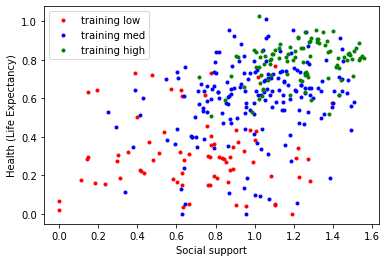

In [85]:
plt.plot(X_train[y_train == "low", 0], X_train[y_train == "low", 1], '.r', label='training low')
plt.plot(X_train[y_train == "med", 0], X_train[y_train == "med", 1], '.b', label='training med')
plt.plot(X_train[y_train == "high", 0], X_train[y_train == "high", 1], '.g', label='training high')
plt.xlabel('Social support')
plt.ylabel('Health (Life Expectancy)')
plt.legend()